In [1]:
# Importing python packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

# controls default text sizes
plt.rc('lines',markersize=8)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
# Importing files
REPO = 'viscosity_liquid_transfer_Pablo'
folder = os.getcwd().split(REPO)[0]+REPO+r'\Opentrons_experiments\\BOTorch_optimization\\VS_code_csv\\'
std = '505'


In [3]:
#Load data frame
folder1 = os.getcwd().split(REPO)[0]+REPO+r'\Opentrons_experiments\\Std_calibrations\\'
df_man = pd.read_csv(folder1+r'\Viscosity_std_'+std+'.csv')

df_man=df_man.drop_duplicates(subset=["volume","aspiration_rate","dispense_rate","blow_out_rate","delay_aspirate","delay_dispense","delay_blow_out","touch_tip_aspirate","touch_tip_dispense"], keep='first')
df_man['time_for_1000']=0
for i in range(len(df_man)):
    if (df_man['blow_out_rate'].iloc[i])<=0:
        df_man['time_for_1000'].iloc[i] = 1000/df_man["aspiration_rate"].iloc[i] + 1000/df_man["dispense_rate"].iloc[i] + df_man["delay_aspirate"].iloc[i] + df_man["delay_dispense"].iloc[i] + df_man["delay_blow_out"].iloc[i]
    else:
        df_man['time_for_1000'].iloc[i] = 1000/df_man["aspiration_rate"].iloc[i] + 1000/df_man["dispense_rate"].iloc[i] + 150/df_man["blow_out_rate"].iloc[i] + df_man["delay_aspirate"].iloc[i] + df_man["delay_dispense"].iloc[i] + df_man["delay_blow_out"].iloc[i]
df_man.reset_index(drop=True)

df_man['iteration']= None
counter= 1
for row in df_man.drop_duplicates(["aspiration_rate","dispense_rate","blow_out_rate","delay_aspirate","delay_dispense","delay_blow_out","touch_tip_aspirate","touch_tip_dispense"]).iterrows():
    df_repeat = df_man.loc[:,["aspiration_rate","dispense_rate","blow_out_rate","delay_aspirate","delay_dispense","delay_blow_out","touch_tip_aspirate","touch_tip_dispense"]]== row[1].loc[["aspiration_rate","dispense_rate","blow_out_rate","delay_aspirate","delay_dispense","delay_blow_out","touch_tip_aspirate","touch_tip_dispense"]]
    index = df_repeat.where(df_repeat.sum(axis=1)==8).dropna().index
    df_man.loc[index,'iteration']=counter
    counter+=1
df_man = df_man.sort_values('iteration')
df_man

#Calcualte means
df_duplicates = df_man.where(df_man.duplicated('iteration',keep=False)==True).dropna(how='all')
df_incomplete = df_man.where(df_man.duplicated('iteration',keep=False)==False).dropna(how='all')
df_mean = pd.DataFrame(columns= df_man.columns)

# for index,values in df_duplicates.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
#     if len(df_duplicates.loc[index:index+2]) == 3:
#         mean_error =df_duplicates.loc[index:index+2,'%error'].mean()
#         df_duplicates.loc[index,'%error'] = mean_error
#         df_duplicates.loc[index, 'volume'] ='mean'+str([300, 500, 1000])
#         df_mean = pd.concat([df_mean,df_man.loc[index:index+2],df_duplicates.loc[[index]]])
#     else:
#         df_incomplete = pd.concat([df_incomplete,df_duplicates.loc[index:index+2]]).drop_duplicates()
# df_mean = pd.concat([df_mean,df_incomplete])
# df_mean = df_mean.sort_values('iteration')
#df_man = df_mean.reset_index(drop=True)   
"""
#Calculate iteration 
counter =1 
for row in df_man.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
    df_repeat = df_man.loc[:,['aspiration_rate','dispense_rate']]== row[1].loc[['aspiration_rate','dispense_rate']]
    index = df_repeat.where(df_repeat.sum(axis=1)==2).dropna().index
    df_man.loc[index,'iteration']=counter
    counter+=1
"""

C:\Users\Shivam\AppData\Local\Temp\ipykernel_3516\670825247.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_man['time_for_1000'].iloc[i] = 1000/df_man["aspiration_rate"].iloc[i] + 1000/df_man["dispense_rate"].iloc[i] + df_man["delay_aspirate"].iloc[i] + df_man["delay_dispense"].iloc[i] + df_man["delay_blow_out"].iloc[i]


"\n#Calculate iteration \ncounter =1 \nfor row in df_man.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():\n    df_repeat = df_man.loc[:,['aspiration_rate','dispense_rate']]== row[1].loc[['aspiration_rate','dispense_rate']]\n    index = df_repeat.where(df_repeat.sum(axis=1)==2).dropna().index\n    df_man.loc[index,'iteration']=counter\n    counter+=1\n"

In [ ]:
df_man

In [ ]:
df_mean

In [4]:
#Load dataframe
df_exp2 = pd.read_csv(folder+r'\Viscosity_std_'+std+'_3_vol_opt_duplicate_unused.csv')

#Calculate iterations
counter =int(1) 
for i in range(0,len(df_exp2)+1,3):
    if len(df_exp2.loc[i:i+2,'volume'].drop_duplicates())==1:
        df_exp2.loc[i,'iteration']=int(counter)
        counter+=1    
        df_exp2.loc[i+1,'iteration']=int(counter)
        counter+=1  
        df_exp2.loc[i+2,'iteration']=int(counter)
        counter+=1          
    else:
        df_exp2.loc[i:i+2,'iteration']=int(counter)
        counter+=1



In [ ]:
df_exp2

In [5]:
#Load data frame
df_exp3 = pd.read_csv(folder+r'\Viscosity_std_'+std+'_exp3_withacq.csv')

#Calculate iteration number
counter =1 
for row in df_exp3.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
    df_repeat = df_exp3.loc[:,['aspiration_rate','dispense_rate']]== row[1].loc[['aspiration_rate','dispense_rate']]
    index = df_repeat.where(df_repeat.sum(axis=1)==2).dropna().index
    df_exp3.loc[index,'iteration']=int(counter)
    counter+=1

#Edit volumes to be all the same 
volumes = ['1000.0','500.0','300.0']
for volume in volumes:
    index = df_exp3.where(df_exp3.volume==volume).dropna(how='all').index
    df_exp3.loc[index,'volume'] = volume[:-2]

#Recalculate mean
for i in range(3,len(df_exp3),4):
    df_exp3.loc[i,'%error'] = df_exp3.loc[i-3:i-1,'%error'].mean()




In [ ]:
df_exp3

#### Plot for exp2 and manual calibration

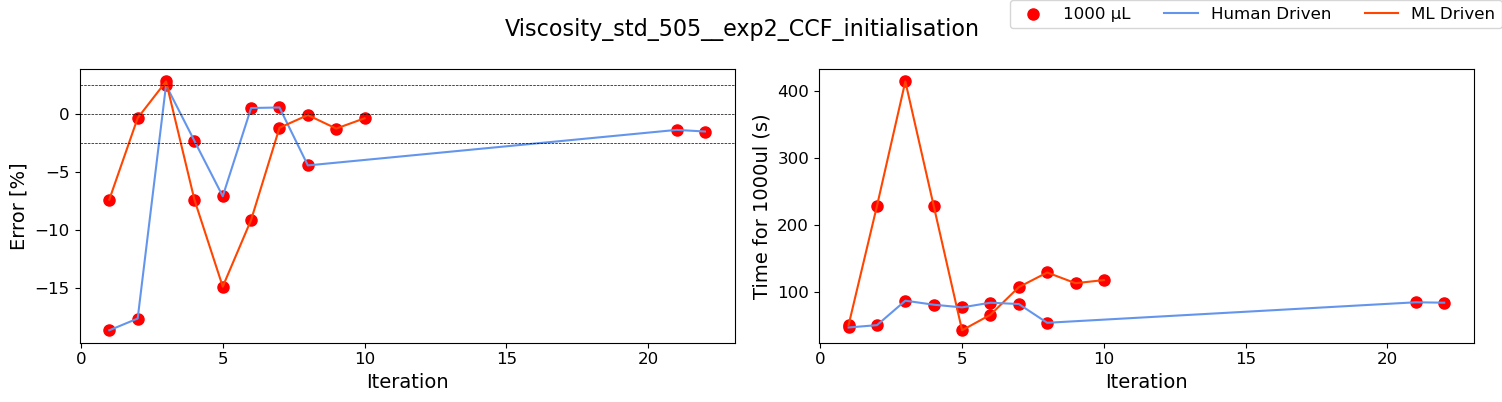

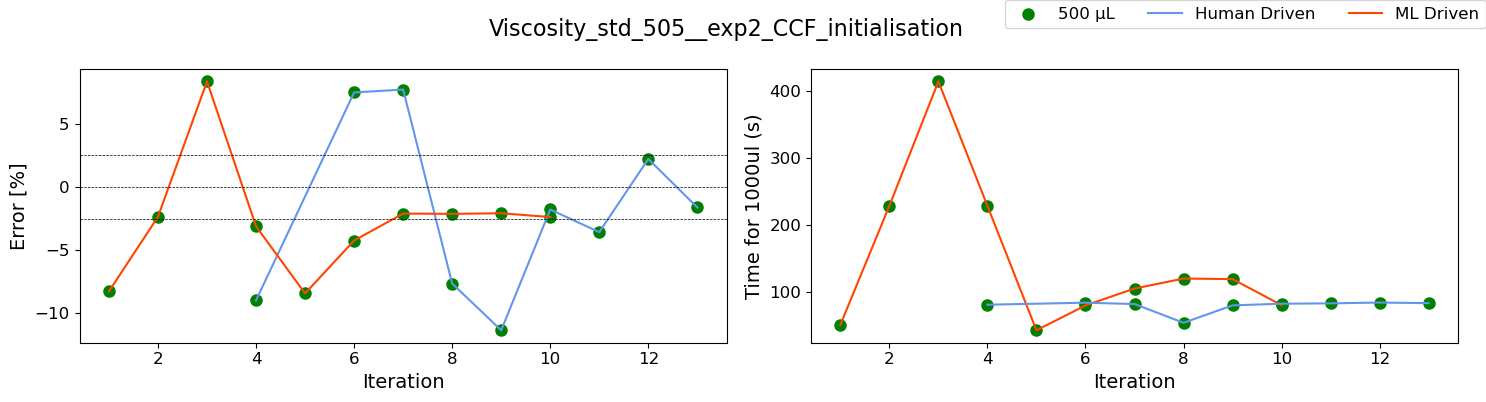

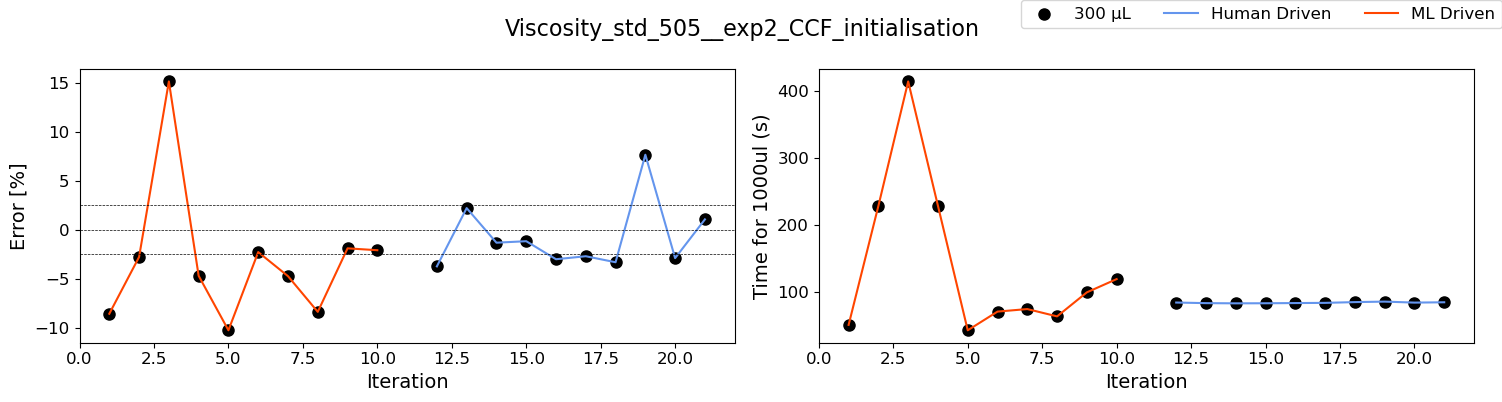

In [14]:
#Makes a figure with manual and ML calibrations, one per volume

for volume in [1000,500,300]:
    df_exp2_plot = df_exp2.where(df_exp2.volume==volume).dropna(how='all').copy()
    df_man_plot = df_man.where(df_man.volume==volume).dropna(how='all').copy()
    #Making subplots (2 rows, 1 column)
    fig,axs = plt.subplots(1,2)

    # Plotting graph 1: Iteration against error
    if volume == 1000:
        color = 'red'
    elif volume== 500:
        color = 'green'
    elif volume ==300:
        color = 'black'    
    
    if len(df_man) != 0:
        axs.flatten()[0].scatter(df_man_plot['iteration'],df_man_plot['%error'], marker= 'o', label = str(volume)+u' \u03bcL', c = color)
        axs.flatten()[0].plot(df_man_plot['iteration'],df_man_plot['%error'], label = 'Human Driven', c = 'cornflowerblue')
   
    if len(df_exp2) != 0:
        axs.flatten()[0].scatter(df_exp2_plot['iteration'],df_exp2_plot['%error'], marker= 'o', c = color)
        axs.flatten()[0].plot(df_exp2_plot['iteration'],df_exp2_plot['%error'], label = 'ML Driven', c = 'orangered')
    
    
    axs.flatten()[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[0].axhline(y=2.5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[0].axhline(y=-2.5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[0].set_xlabel('Iteration')
    axs.flatten()[0].set_ylabel('Error [%]')



    axs.flatten()[1].scatter(df_exp2_plot['iteration'],df_exp2_plot['time_asp_1000'], marker= 'o', c = color)
    axs.flatten()[1].plot(df_exp2_plot['iteration'],df_exp2_plot['time_asp_1000'],  c = 'orangered')

    axs.flatten()[1].scatter(df_man_plot['iteration'],df_man_plot['time_for_1000'], marker= 'o', c = color)
    axs.flatten()[1].plot(df_man_plot['iteration'],df_man_plot['time_for_1000'], c = 'cornflowerblue')


    axs.flatten()[1].set_xlabel('Iteration')
    axs.flatten()[1].set_ylabel('Time for 1000ul (s)')

    fig.set_size_inches(15, 4)
    fig.suptitle('Viscosity_std_'+std+'_'+'_exp2_CCF_initialisation')
#    fig.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=5, mode="expand", borderaxespad=0.)
#    fig.suptitle('Viscosity standard '+str(std)+ 'cp batch volume optimization')
    fig.legend( loc='upper right',ncol=3, borderaxespad=0.)
    fig.tight_layout()

    REPO = 'viscosity_liquid_transfer_Pablo'
    folder2 = os.getcwd().split(REPO)[0]+REPO+r'\Opentrons_experiments\\BOTorch_optimization\\Shivam_Report\\Clear_graphs_using_plot_presentation'
    fig.savefig(folder2+r'\\'+'Viscosity_std_'+std+'_exp2_'+str(volume)+'ul_line_updated.png')

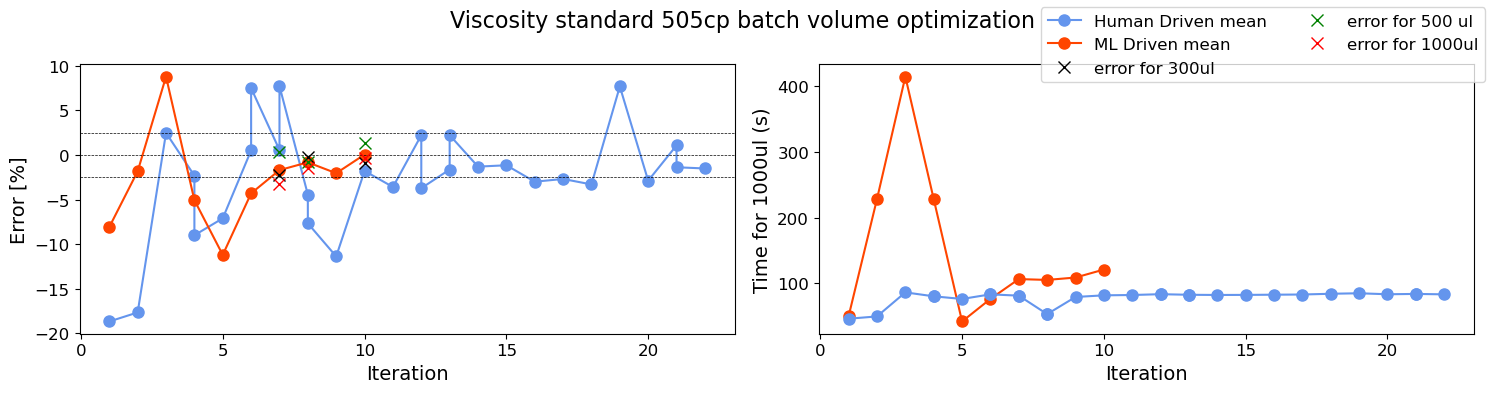

In [7]:
#Making subplots (2 rows, 2 column)
fig,axs = plt.subplots(1,2)

# Dropping NAN rows
df_man_1000 = df_man.where(df_man.volume==1000).dropna(how='all')
df_man_500 = df_man.where(df_man.volume==500).dropna(how='all')
df_man_300 = df_man.where(df_man.volume==300).dropna(how='all')
df_man_100 = df_man.where(df_man.volume==100).dropna(how='all')


df_exp3_1000 = df_exp3.where(df_exp3.volume=='1000').dropna(how='all')
df_exp3_500 = df_exp3.where(df_exp3.volume=='500').dropna(how='all')
df_exp3_300 = df_exp3.where(df_exp3.volume=='300').dropna(how='all')
df_exp3_100 = df_exp3.where(df_exp3.volume=='100').dropna(how='all')
df_exp3_mean = df_exp3.where(df_exp3.volume=='mean[300, 500, 1000]').dropna(how='all')

#find min error

df_exp3_mean_min_iteration = df_exp3_mean[['iteration','%error']].abs().sort_values('%error').iloc[0:3,0].copy()
df_exp3_mean_min_iteration_df = pd.DataFrame(data=df_exp3_mean_min_iteration)

test_mean_df = pd.DataFrame()
test_300_df = pd.DataFrame()
test_500_df = pd.DataFrame()
test_1000_df = pd.DataFrame()
for i in df_exp3_mean_min_iteration_df['iteration']:
    test_mean_df= pd.concat([test_mean_df, df_exp3_mean[df_exp3_mean['iteration']==int(i)]])
    test_300_df= pd.concat([test_300_df, df_exp3_300[df_exp3_300['iteration']==int(i)]])
    test_500_df= pd.concat([test_500_df, df_exp3_500[df_exp3_500['iteration']==int(i)]])
    test_1000_df= pd.concat([test_1000_df, df_exp3_1000[df_exp3_1000['iteration']==int(i)]])

# Plotting graph 1: Iteration against error
if len(df_man) != 0:
    axs.flatten()[0].plot(df_man['iteration'],df_man['%error'],marker= 'o', label = 'Human Driven mean', c = 'cornflowerblue')


if len(df_exp3_mean) != 0:
    axs.flatten()[0].plot(df_exp3_mean['iteration'],df_exp3_mean['%error'],marker= 'o', label='ML Driven mean',c = 'orangered')


for i in range(len(axs.flatten())-1):
    axs.flatten()[i].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[i].axhline(y=2.5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[i].axhline(y=-2.5, ls = '--', color = 'black', linewidth=0.5)
    axs.flatten()[i].set_xlabel('Iteration')
    axs.flatten()[i].set_ylabel('Error [%]')



if len(df_exp3_mean) != 0:
    axs.flatten()[1].plot(df_exp3_mean['iteration'],df_exp3_mean['time_asp_1000'], marker ='o', c = 'orangered')

axs.flatten()[0].plot(test_300_df['iteration'],test_300_df['%error'], marker= 'x', c = 'black', linestyle='None', label = 'error for 300ul')
axs.flatten()[0].plot(test_500_df['iteration'],test_500_df['%error'], marker= 'x', c = 'green', linestyle='None', label = 'error for 500 ul')
axs.flatten()[0].plot(test_1000_df['iteration'],test_1000_df['%error'], marker= 'x', c = 'red', linestyle='None', label = 'error for 1000ul')
axs.flatten()[1].plot(df_man['iteration'],df_man['time_for_1000'], marker= 'o', c = 'cornflowerblue')
axs.flatten()[1].set_xlabel('Iteration')
axs.flatten()[1].set_ylabel('Time for 1000ul (s)')


fig.set_size_inches(15, 4)
fig.suptitle('Viscosity standard '+str(std)+ 'cp batch volume optimization')
fig.legend( loc='upper right',ncol=2)
fig.tight_layout()

# REPO = 'viscosity_liquid_transfer_Pablo'
# folder3 = os.getcwd().split(REPO)[0]+REPO+r'\Opentrons_experiments\\BOTorch_optimization\\Shivam_Report\\Clear_graphs_using_plot_presentation'
# fig.savefig(folder3+r'\\'+'Viscosity_std_'+std+'_exp3_line_updated.png')





In [ ]:
df_exp3_500.where(df_exp3_500['iteration']==df_exp3_mean_min_iteration)

In [ ]:
df_exp3_mean

In [8]:
df_exp3_mean_min_iteration = df_exp3_mean[['iteration','%error']].abs().sort_values('%error').iloc[0:3,0].copy()
df_exp3_mean_min_iteration_df = pd.DataFrame(data=df_exp3_mean_min_iteration)
df_exp3_mean_min_iteration_df

,iteration
39,10.0
31,8.0
27,7.0


In [ ]:
df_man_mean_min_iteration = df_man[['iteration','%error']].abs().sort_values('%error').iloc[0:3,0].copy()
df_man_mean_min_iteration_df = pd.DataFrame(data=df_man_mean_min_iteration)
df_man_mean_min_iteration_df

In [ ]:
df_exp3_mean

In [ ]:
df_man

In [ ]:
test_mean_df = pd.DataFrame()
test_300_df = pd.DataFrame()
test_500_df = pd.DataFrame()
test_1000_df = pd.DataFrame()
for i in df_exp3_mean_min_iteration_df['iteration']:
    test_mean_df= pd.concat([test_mean_df, df_exp3_mean[df_exp3_mean['iteration']==int(i)]])
    test_300_df= pd.concat([test_300_df, df_exp3_300[df_exp3_300['iteration']==int(i)]])
    test_500_df= pd.concat([test_500_df, df_exp3_500[df_exp3_500['iteration']==int(i)]])
    test_1000_df= pd.concat([test_1000_df, df_exp3_1000[df_exp3_1000['iteration']==int(i)]])
test_1000_df

In [ ]:
t=np.arange(0, 5, 0.2)

plt.plot(t**2, "g*")
plt.plot(t, "r--")


plt.xlabel("Time")
plt.suptitle("Superimposing both graphs in one")
plt.show()

In [9]:
df_exp3_mean

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,iteration
3,Viscosity_std_505,p1000,"mean[300, 500, 1000]",49.507284,49.507284,0.0,5.0,5.0,0.0,-8.073247,50.398096,NaN,1.0
7,Viscosity_std_505,p1000,"mean[300, 500, 1000]",61.884105,4.950728,0.0,5.0,5.0,0.0,-1.822207,228.149719,NaN,2.0
11,Viscosity_std_505,p1000,"mean[300, 500, 1000]",4.950728,4.950728,0.0,5.0,5.0,0.0,8.783447,413.980961,NaN,3.0
15,Viscosity_std_505,p1000,"mean[300, 500, 1000]",4.950728,61.884105,0.0,5.0,5.0,0.0,-5.060975,228.149719,NaN,4.0
19,Viscosity_std_505,p1000,"mean[300, 500, 1000]",61.884105,61.884105,0.0,5.0,5.0,0.0,-11.193008,42.318477,NaN,5.0
23,Viscosity_std_505,p1000,"mean[300, 500, 1000]",54.631917,20.707392,0.0,5.0,5.0,0.0,-4.295750,76.596252,26.207491,6.0
27,Viscosity_std_505,p1000,"mean[300, 500, 1000]",45.272971,13.405824,0.0,5.0,5.0,0.0,-1.691684,106.682682,19.120842,7.0
31,Viscosity_std_505,p1000,"mean[300, 500, 1000]",51.774776,13.141273,0.0,5.0,5.0,0.0,-0.820249,105.410553,27.246826,8.0
35,Viscosity_std_505,p1000,"mean[300, 500, 1000]",57.954057,12.227472,0.0,5.0,5.0,0.0,-2.039746,109.038101,21.125670,9.0
39,Viscosity_std_505,p1000,"mean[300, 500, 1000]",44.364301,11.284247,0.0,5.0,5.0,0.0,0.053745,121.159760,23.276871,10.0


In [10]:
df_exp3_300

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,iteration
2,Viscosity_std_505,p1000,300,49.507284,49.507284,0.0,5.0,5.0,0.0,-8.556950,50.398096,NaN,1.0
6,Viscosity_std_505,p1000,300,61.884105,4.950728,0.0,5.0,5.0,0.0,-2.760183,228.149719,NaN,2.0
10,Viscosity_std_505,p1000,300,4.950728,4.950728,0.0,5.0,5.0,0.0,15.167569,413.980961,NaN,3.0
14,Viscosity_std_505,p1000,300,4.950728,61.884105,0.0,5.0,5.0,0.0,-4.679642,228.149719,NaN,4.0
18,Viscosity_std_505,p1000,300,61.884105,61.884105,0.0,5.0,5.0,0.0,-10.246075,42.318477,NaN,5.0
22,Viscosity_std_505,p1000,300,54.631917,20.707392,0.0,5.0,5.0,0.0,-2.337902,76.596252,26.207491,6.0
26,Viscosity_std_505,p1000,300,45.272971,13.405824,0.0,5.0,5.0,0.0,-2.184345,106.682682,19.120842,7.0
30,Viscosity_std_505,p1000,300,51.774776,13.141273,0.0,5.0,5.0,0.0,-0.226496,105.410553,27.246826,8.0
34,Viscosity_std_505,p1000,300,57.954057,12.227472,0.0,5.0,5.0,0.0,-1.685285,109.038101,21.125670,9.0
38,Viscosity_std_505,p1000,300,44.364301,11.284247,0.0,5.0,5.0,0.0,-0.840723,121.159760,23.276871,10.0


In [11]:
df_exp3_500

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,iteration
1,Viscosity_std_505,p1000,500,49.507284,49.507284,0.0,5.0,5.0,0.0,-8.280548,50.398096,NaN,1.0
5,Viscosity_std_505,p1000,500,61.884105,4.950728,0.0,5.0,5.0,0.0,-2.360935,228.149719,NaN,2.0
9,Viscosity_std_505,p1000,500,4.950728,4.950728,0.0,5.0,5.0,0.0,8.372682,413.980961,NaN,3.0
13,Viscosity_std_505,p1000,500,4.950728,61.884105,0.0,5.0,5.0,0.0,-3.121041,228.149719,NaN,4.0
17,Viscosity_std_505,p1000,500,61.884105,61.884105,0.0,5.0,5.0,0.0,-8.441783,42.318477,NaN,5.0
21,Viscosity_std_505,p1000,500,54.631917,20.707392,0.0,5.0,5.0,0.0,-5.009789,76.596252,26.207491,6.0
25,Viscosity_std_505,p1000,500,45.272971,13.405824,0.0,5.0,5.0,0.0,0.333986,106.682682,19.120842,7.0
29,Viscosity_std_505,p1000,500,51.774776,13.141273,0.0,5.0,5.0,0.0,-0.817690,105.410553,27.246826,8.0
33,Viscosity_std_505,p1000,500,57.954057,12.227472,0.0,5.0,5.0,0.0,-1.715997,109.038101,21.125670,9.0
37,Viscosity_std_505,p1000,500,44.364301,11.284247,0.0,5.0,5.0,0.0,1.324427,121.159760,23.276871,10.0


In [12]:
df_exp3_1000

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out_rate,delay_aspirate,delay_dispense,delay_blow_out,%error,time_asp_1000,acq_value,iteration
0,Viscosity_std_505,p1000,1000,49.507284,49.507284,0.0,5.0,5.0,0.0,-7.382241,50.398096,NaN,1.0
4,Viscosity_std_505,p1000,1000,61.884105,4.950728,0.0,5.0,5.0,0.0,-0.345503,228.149719,NaN,2.0
8,Viscosity_std_505,p1000,1000,4.950728,4.950728,0.0,5.0,5.0,0.0,2.810089,413.980961,NaN,3.0
12,Viscosity_std_505,p1000,1000,4.950728,61.884105,0.0,5.0,5.0,0.0,-7.382241,228.149719,NaN,4.0
16,Viscosity_std_505,p1000,1000,61.884105,61.884105,0.0,5.0,5.0,0.0,-14.891167,42.318477,NaN,5.0
20,Viscosity_std_505,p1000,1000,54.631917,20.707392,0.0,5.0,5.0,0.0,-5.539560,76.596252,26.207491,6.0
24,Viscosity_std_505,p1000,1000,45.272971,13.405824,0.0,5.0,5.0,0.0,-3.224692,106.682682,19.120842,7.0
28,Viscosity_std_505,p1000,1000,51.774776,13.141273,0.0,5.0,5.0,0.0,-1.416561,105.410553,27.246826,8.0
32,Viscosity_std_505,p1000,1000,57.954057,12.227472,0.0,5.0,5.0,0.0,-2.717955,109.038101,21.125670,9.0
36,Viscosity_std_505,p1000,1000,44.364301,11.284247,0.0,5.0,5.0,0.0,-0.322469,121.159760,23.276871,10.0
